# Table of Contents

1. [Import & Set Up](#import_everything)
2. [Load in data](#load_files)
3. [Center of Mass](#c_o_m)
    1. [distance apart](#distance_apart)
    2. [error by overlap](#error_by_overlap)
4. [Face Associate Task](#face_task)

# Import Stuff
<a id='import_everything'></a>

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, Image

import seaborn as sns
import matplotlib.animation as animation
import os as os
from collections import defaultdict
import shutil
import glob
import sys
from statsmodels.stats.anova import AnovaRM


# sns.set_style(style='white')
# pd.set_option('display.max_columns', 500)


### Set directory

In [6]:
print('Number of arguments:', len(sys.argv), 'arguments.')
print('Argument List:', str(sys.argv))
print('---')
from_cmdLine = sys.argv[-1]
print(from_cmdLine)

print('---')

if from_cmdLine == 'cmd' :
    data_file = sys.argv[-2]
    print('using command line to set data')
    data_dir = data_file + '/'
else :
    print('using script to set data')
#     data_dir = '/Users/victoria/go/src/github.com/emer/leabra/examples/color_diff/data/2021_03_13_rerunning_05_v2/'

    #### NOTE THAT THE BEST DEFAULT VERSION OF COLOR DIFF IS 2021_10_06_default
    data_dir = '/Users/victoria/go/src/github.com/emer/leabra/examples/color_diff/data/2021_10_06_default/'

    data_dir = '/Users/victoria/go/src/github.com/emer/leabra/examples/color_diff/data/2021_10_09_generalization/'
    
    data_dir = '/Users/victoria/go/src/github.com/emer/leabra/examples/color_diff/data/2021_10_13_default_w_KWTA/'
    
#     data_dir = '/Users/victoria/go/src/github.com/emer/leabra/examples/color_diff/data/test_overlap/'
    data_dir = '/Users/victoria/go/src/github.com/emer/leabra/examples/color_diff/data/2021_12_23_color_diff/'

results_dir = data_dir + '/results/'
if not os.path.exists(results_dir) :
    os.mkdir(results_dir)

eps_dir = results_dir + 'eps_files/'

if not os.path.exists(eps_dir):
    os.mkdir(eps_dir)

Number of arguments: 3 arguments.
Argument List: ['/usr/people/qanguyen/anaconda3/envs/leabra/lib/python3.8/site-packages/ipykernel_launcher.py', '-f', '/mnt/cup/people/qanguyen/.local/share/jupyter/runtime/kernel-e9030c01-fb1f-42d3-9235-f0985925198c.json']
---
/mnt/cup/people/qanguyen/.local/share/jupyter/runtime/kernel-e9030c01-fb1f-42d3-9235-f0985925198c.json
---
using script to set data


# Load in files
<a id='load_files'></a>

In [7]:
curr_dirs = []
overlap = np.arange(6)

for o in overlap :

    o = str(o)
    curr_d = 'results_--HiddNumOverlapUnits=' + o + '/'
    print(curr_d)
    curr_dirs.append(curr_d)
    
all_c_mass_list = []
all_face_list = []
all_repulsion_list = []
all_corr_pre_post_list = []
all_corr_list = []


for d in curr_dirs :
    all_c_mass_list.append(pd.read_csv(data_dir + d + 'fig/results/center_of_mass.csv', index_col = 0))
    
    all_face_list.append(pd.read_csv(data_dir + d + 'fig/results/face_data.csv', index_col = 0))
    
    all_repulsion_list.append(pd.read_csv(data_dir + d + 'fig/results/repulsion_count_each_run.csv', index_col = 0))
    
    all_corr_pre_post_list.append(pd.read_csv(data_dir + d + 'fig/results/pre_post_corr.csv', index_col = 0))
    
    all_corr_list.append(pd.read_csv(data_dir + d + 'fig/results/correlation.csv', index_col = 0))

    
all_c_mass_df = pd.concat(all_c_mass_list, 0)
all_c_mass_df['overlap'] = all_c_mass_df['overlap'].astype('category')
all_c_mass_df['layer'] = all_c_mass_df['layer'].astype('category')
all_c_mass_df['order'] = all_c_mass_df['order'].astype('category')

all_face_df = pd.concat(all_face_list,0)
all_face_df['overlap'] = all_face_df['overlap'].astype('category')
all_face_df['unit'] = all_face_df['unit'].astype('category')

all_corr_pre_post_df = pd.concat(all_corr_pre_post_list, 0)

all_corr_df = pd.concat(all_corr_list, 0)
all_corr_df['layer'] = all_corr_df['layer'].astype('category')

all_corr_df['overlap'] = all_corr_df['overlap'].astype('category')

all_repulsion_df = pd.concat(all_repulsion_list,0)

results_--HiddNumOverlapUnits=0/
results_--HiddNumOverlapUnits=1/
results_--HiddNumOverlapUnits=2/
results_--HiddNumOverlapUnits=3/
results_--HiddNumOverlapUnits=4/
results_--HiddNumOverlapUnits=5/


In [8]:
hidden_c_mass_df = all_c_mass_df[all_c_mass_df['layer']=='hidden'].reset_index()
color_c_mass_df = all_c_mass_df[all_c_mass_df['layer']=='color'].reset_index()



In [9]:
len(all_corr_df.index)

50400

In [10]:
palette_before_after = {'Before': (.6,.6,.6), 'After': (0,0,0)}


In [12]:
color_c_mass_df

,index,run,time,type,stim,layer,c_o_m,true_c_o_m,raw_error,rev_error,order,overlap
0,0,0,pre,raw,low1,color,0.000000e+00,NaN,NaN,0.00000,NaN,0/6
1,1,0,pre,raw,low2,color,0.000000e+00,NaN,NaN,0.00000,NaN,0/6
2,2,0,pre,raw,med1,color,2.250032e+01,22.5,0.00032,0.00032,second,0/6
3,3,0,pre,raw,med2,color,2.849962e+01,28.5,-0.00038,0.00038,first,0/6
4,4,0,pre,raw,high1,color,0.000000e+00,NaN,NaN,0.00000,NaN,0/6
...,...,...,...,...,...,...,...,...,...,...,...,...
4111,681,46,post,diff,med_diff,color,-7.105427e-15,1.0,NaN,NaN,NaN,5/6
4112,682,47,pre,diff,med_diff,color,9.767719e-01,1.0,NaN,NaN,NaN,5/6
4113,683,47,post,diff,med_diff,color,0.000000e+00,1.0,NaN,NaN,NaN,5/6
4114,684,48,pre,diff,med_diff,color,9.823467e-01,1.0,NaN,NaN,NaN,5/6


In [13]:
hidden_c_mass_df

,index,run,time,type,stim,layer,c_o_m,true_c_o_m,raw_error,rev_error,order,overlap
0,0,0,pre,raw,low1,hidden,0.000000,NaN,NaN,NaN,NaN,0/6
1,1,0,pre,raw,low2,hidden,0.000000,NaN,NaN,NaN,NaN,0/6
2,2,0,pre,raw,med1,hidden,22.500002,NaN,NaN,NaN,NaN,0/6
3,3,0,pre,raw,med2,hidden,28.499998,NaN,NaN,NaN,NaN,0/6
4,4,0,pre,raw,high1,hidden,0.000000,NaN,NaN,NaN,NaN,0/6
...,...,...,...,...,...,...,...,...,...,...,...,...
3523,583,48,post,raw,low2,hidden,0.000000,NaN,NaN,NaN,NaN,5/6
3524,584,48,post,raw,med1,hidden,28.000000,NaN,NaN,NaN,NaN,5/6
3525,585,48,post,raw,med2,hidden,28.000000,NaN,NaN,NaN,NaN,5/6
3526,586,48,post,raw,high1,hidden,0.000000,NaN,NaN,NaN,NaN,5/6


In [ ]:
np.unique(all_corr_df["$CurrentTask"])

# Within Pair Correlation Over Time


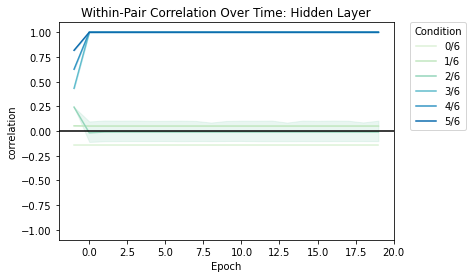

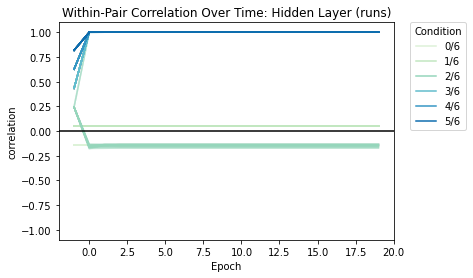

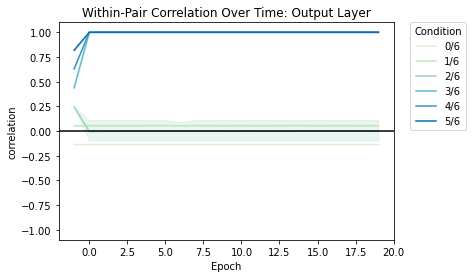

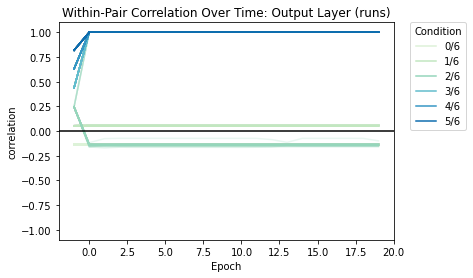

In [14]:



def plot_within_pair_correlation(data, layer, split = False):
    plt.clf()
    is_within_pair = data['pair_type'] == 'med1-med2'
    is_layer = data['layer'] == layer

    within_pair_correlation_pre_post = data[(is_within_pair) & (is_layer)]
    # display(within_pair_correlation_pre_post)
    
    within_pair_correlation_pre_post = (within_pair_correlation_pre_post.set_index(pd.Series((range(len(within_pair_correlation_pre_post))))))
    if split == True:
        sns.lineplot(x = '|Epoch', y = 'correlation', hue='overlap', data = within_pair_correlation_pre_post,
                     palette = 'GnBu', units = '|Run', estimator = None, alpha = .2)
    elif split == False:
        sns.lineplot(x = '|Epoch', y = 'correlation', hue='overlap', data = within_pair_correlation_pre_post,
                     palette = 'GnBu')

    plt.axhline(y = 0, c = 'k')
    plt.ylim([-1.1, 1.1])
    title = 'Within-Pair Correlation Over Time: ' + layer.capitalize() + ' Layer'
    if split == True:
        title = title + ' (runs)'
    plt.legend(title = 'Condition', bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0.)
    plt.xlabel('Epoch')
    plt.title(title)
        
    plt.savefig(results_dir + title + '.png', bbox_inches='tight')
    plt.show()

    
plot_within_pair_correlation(all_corr_df, 'hidden', split = False)
plot_within_pair_correlation(all_corr_df, 'hidden', split = True)
plot_within_pair_correlation(all_corr_df, 'output', split = False)
plot_within_pair_correlation(all_corr_df, 'output', split = True)



In [17]:
def select_data(data):
    
    is_within_pair = data['pair_type'] == 'med1-med2'
    is_layer = data['layer'] == 'hidden'
    is_pre_or_post = data['|Epoch'].isin([data['|Epoch'].min(), data['|Epoch'].max()])

    within_pair_correlation_pre_post = data[(is_within_pair) & (is_layer) & (is_pre_or_post)]
    within_pair_correlation_pre_post
    
    return within_pair_correlation_pre_post

within_pair_correlation_pre_post = select_data(all_corr_df)




In [18]:
epoch_min = within_pair_correlation_pre_post['|Epoch'].min()
epoch_max = within_pair_correlation_pre_post['|Epoch'].max()

within_pair_correlation_pre_post['Time'] = within_pair_correlation_pre_post['|Epoch'].map({epoch_min:'Before', epoch_max:'After'})
within_pair_correlation_pre_post


<ipython-input-18-79f340498f30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  within_pair_correlation_pre_post['Time'] = within_pair_correlation_pre_post['|Epoch'].map({epoch_min:'Before', epoch_max:'After'})


,|Run,|Epoch,$CurrentTask,$CurrentTest,firstItem,secondItem,correlation,pair,pair_type,layer,overlap,Time
1,0,-1,TaskColorWOOsc,TestColorAll,med1,med2,-0.136363,med1-med2,med1-med2,hidden,0/6,Before
81,0,19,TaskColorRecall,TestColorAll,med1,med2,-0.136363,med1-med2,med1-med2,hidden,0/6,After
85,1,-1,TaskColorWOOsc,TestColorAll,med1,med2,-0.136363,med1-med2,med1-med2,hidden,0/6,Before
165,1,19,TaskColorRecall,TestColorAll,med1,med2,-0.136363,med1-med2,med1-med2,hidden,0/6,After
169,2,-1,TaskColorWOOsc,TestColorAll,med1,med2,-0.136363,med1-med2,med1-med2,hidden,0/6,Before
...,...,...,...,...,...,...,...,...,...,...,...,...
4029,47,19,TaskColorRecall,TestColorAll,med1,med2,1.000000,med1-med2,med1-med2,hidden,5/6,After
4033,48,-1,TaskColorWOOsc,TestColorAll,med1,med2,0.817310,med1-med2,med1-med2,hidden,5/6,Before
4113,48,19,TaskColorRecall,TestColorAll,med1,med2,1.000000,med1-med2,med1-med2,hidden,5/6,After
4117,49,-1,TaskColorWOOsc,TestColorAll,med1,med2,0.817783,med1-med2,med1-med2,hidden,5/6,Before


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


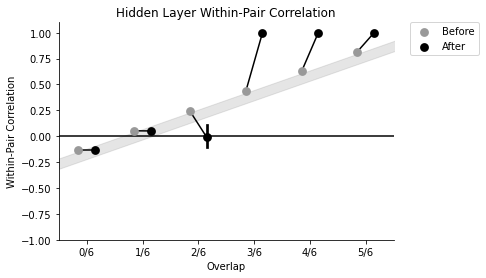

In [19]:
def pre_post_corr_parameter_shift(data, x_parameter, ribbon = False):


    plt.clf()
#     ax = sns.stripplot(x = parameter, y = 'correlation', hue = '|Epoch', 
#                  data = within_pair_correlation_pre_post, dodge = .3, alpha = .1, palette = 'Dark2_r')

    
#     if ribbon == True:
#         plt.fill_between(x, .21, .29, alpha  = .2, color = 'grey')
        
    ax = sns.pointplot(x = 'overlap', y = 'correlation', hue = 'Time', 
                  linestyles = '', dodge = .3, data = data, palette = palette_before_after)
    
    num_categories = len(data['overlap'].unique())
    for (x1, y1), (x2, y2) in zip(ax.lines[0].get_xydata(), ax.lines[num_categories + 1].get_xydata()):
        ax.plot([x1, x2], [y1, y2], color='black', zorder = 0)

    x = np.arange(-1, 7, .01)
    
    slope = .189
    y1 = x*slope -.22
    y2= x*slope -.12
    
    if ribbon == True:
        plt.fill_between(x, y1, y2, alpha = .2, color = 'grey', zorder = 0)

    plt.axhline(0, color = 'k', linestyle = '-', zorder = 0)

    handles, labels = ax.get_legend_handles_labels()
    
    l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    

#     l.get_texts()[0].set_text('Before')
#     l.get_texts()[1].set_text('After')
    title = 'Hidden Layer Within-Pair Correlation'
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.xlabel('Overlap')
    plt.ylim([-1,1.1])
    plt.xlim([-.5, 5.5])
    plt.ylabel('Within-Pair Correlation')
    plt.title(title)
    plt.savefig(results_dir + title + '.png', bbox_inches='tight')
    plt.savefig(eps_dir + title + '.eps', bbox_inches='tight')

    plt.show()
    
    return ax
ax = pre_post_corr_parameter_shift(within_pair_correlation_pre_post, 'overlap', ribbon = True)

# Within Pair Correlation Over Time


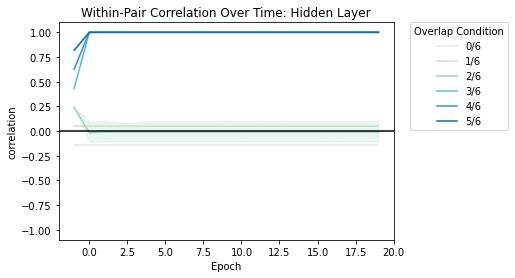

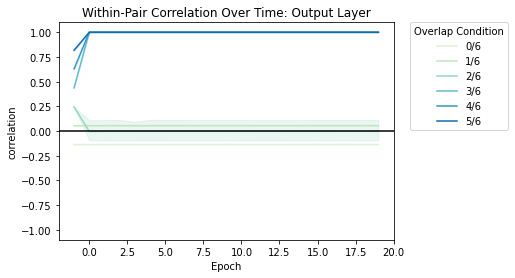

In [23]:
def plot_within_pair_correlation(data, layer):

    plt.clf()
    is_within_pair = data['pair_type'] == 'med1-med2'
    is_layer = data['layer'] == layer

    within_pair_correlation_pre_post = data[(is_within_pair) & (is_layer)]
    within_pair_correlation_pre_post = (within_pair_correlation_pre_post.set_index(pd.Series((range(len(within_pair_correlation_pre_post))))))
    ax = sns.lineplot(x = '|Epoch', y = 'correlation', hue='overlap', data = within_pair_correlation_pre_post, palette = 'GnBu')
    plt.axhline(y = 0, c = 'k')
    plt.ylim([-1.1, 1.1])
    title = 'Within-Pair Correlation Over Time: ' + layer.capitalize() + ' Layer'
    
    plt.title(title)
    plt.legend(title = 'Overlap Condition', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.xlabel('Epoch')
    plt.savefig(results_dir + title + '.png', bbox_inches='tight')
    plt.show()


    
plot_within_pair_correlation(all_corr_df, 'hidden')
plot_within_pair_correlation(all_corr_df, 'output')


# Center of Mass analyses
<a id = 'c_o_m'></a>


### Center of Mass - # units apart
<a id = distance_apart></a>


In [28]:

epoch_min = within_pair_correlation_pre_post['|Epoch'].min()
epoch_max = within_pair_correlation_pre_post['|Epoch'].max()

within_pair_correlation_pre_post['Time'] = within_pair_correlation_pre_post['|Epoch'].map({epoch_min:'Before', epoch_max:'After'})
within_pair_correlation_pre_post


<ipython-input-28-79f340498f30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  within_pair_correlation_pre_post['Time'] = within_pair_correlation_pre_post['|Epoch'].map({epoch_min:'Before', epoch_max:'After'})


,|Run,|Epoch,$CurrentTask,$CurrentTest,firstItem,secondItem,correlation,pair,pair_type,layer,overlap,Time
1,0,-1,TaskColorWOOsc,TestColorAll,med1,med2,-0.136363,med1-med2,med1-med2,hidden,0/6,Before
81,0,19,TaskColorRecall,TestColorAll,med1,med2,-0.136363,med1-med2,med1-med2,hidden,0/6,After
85,1,-1,TaskColorWOOsc,TestColorAll,med1,med2,-0.136363,med1-med2,med1-med2,hidden,0/6,Before
165,1,19,TaskColorRecall,TestColorAll,med1,med2,-0.136363,med1-med2,med1-med2,hidden,0/6,After
169,2,-1,TaskColorWOOsc,TestColorAll,med1,med2,-0.136363,med1-med2,med1-med2,hidden,0/6,Before
...,...,...,...,...,...,...,...,...,...,...,...,...
4029,47,19,TaskColorRecall,TestColorAll,med1,med2,1.000000,med1-med2,med1-med2,hidden,5/6,After
4033,48,-1,TaskColorWOOsc,TestColorAll,med1,med2,0.817310,med1-med2,med1-med2,hidden,5/6,Before
4113,48,19,TaskColorRecall,TestColorAll,med1,med2,1.000000,med1-med2,med1-med2,hidden,5/6,After
4117,49,-1,TaskColorWOOsc,TestColorAll,med1,med2,0.817783,med1-med2,med1-med2,hidden,5/6,Before


In [29]:
color_c_mass_df['time']= color_c_mass_df['time'].map({'pre':'Before', 'post':'After'})

,index,run,time,type,stim,layer,c_o_m,true_c_o_m,raw_error,rev_error,order,overlap
588,588,0,Before,diff,med_diff,color,5.999295e+00,6.0,NaN,NaN,NaN,0/6
589,589,0,After,diff,med_diff,color,5.999329e+00,6.0,NaN,NaN,NaN,0/6
590,590,1,Before,diff,med_diff,color,5.999199e+00,6.0,NaN,NaN,NaN,0/6
591,591,1,After,diff,med_diff,color,5.999238e+00,6.0,NaN,NaN,NaN,0/6
592,592,2,Before,diff,med_diff,color,6.000576e+00,6.0,NaN,NaN,NaN,0/6
...,...,...,...,...,...,...,...,...,...,...,...,...
4111,681,46,After,diff,med_diff,color,-7.105427e-15,1.0,NaN,NaN,NaN,5/6
4112,682,47,Before,diff,med_diff,color,9.767719e-01,1.0,NaN,NaN,NaN,5/6
4113,683,47,After,diff,med_diff,color,0.000000e+00,1.0,NaN,NaN,NaN,5/6
4114,684,48,Before,diff,med_diff,color,9.823467e-01,1.0,NaN,NaN,NaN,5/6


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


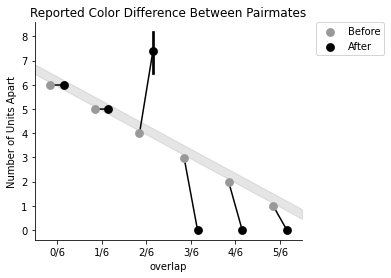

In [57]:
def center_of_mass_dist(data_df, layer, ribbon) :
    plt.clf()
    
#     data_df = data_df[data_df['run']<=23]
    
    diff_data = data_df[data_df['stim'].isin(['med_diff'])]

    display(diff_data)
    ax = sns.pointplot(x = 'overlap', y = 'c_o_m', hue = 'time', dodge = .3, data = diff_data, ci = 95, linestyles = ' ', palette = palette_before_after)
   
    num_categories = len(data_df['overlap'].unique())
    for (x1, y1), (x2, y2) in zip(ax.lines[0].get_xydata(), ax.lines[num_categories + 1].get_xydata()):
        ax.plot([x1, x2], [y1, y2], color='black', zorder = 0)

#     ax = sns.stripplot(x = 'overlap', y = 'c_o_m', hue = 'time', dodge = .3, data = diff_data, alpha = .1, palette = palette_before_after, zorder = 0)

    x = np.arange(-.5, 5.5, .01)
    slope = -1
    y1 = x*slope +5.95
    y2= x*slope +6.35
    
    if ribbon == True:
        plt.fill_between(x, y1, y2, alpha = .2, color = 'grey', zorder = 0)
        
    plt.xlim(-.5,5.5)
    handles, labels = ax.get_legend_handles_labels()
    l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#     l.get_texts()[0].set_text('Before')
#     l.get_texts()[1].set_text('After')
    title = 'Reported Color Difference Between Pairmates'
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    plt.title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.ylabel('Number of Units Apart')
    plt.savefig(results_dir + title + '.png', bbox_inches='tight')
    plt.savefig(eps_dir + title + '.eps', bbox_inches='tight')

    plt.show()

center_of_mass_dist(color_c_mass_df, 'Color', ribbon = True)



In [31]:

order_palette = {'first': (.325, .58, .596), 'second': (.741, .304, .545)}


### error analysis
<a id = error_by_overlap></a>


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

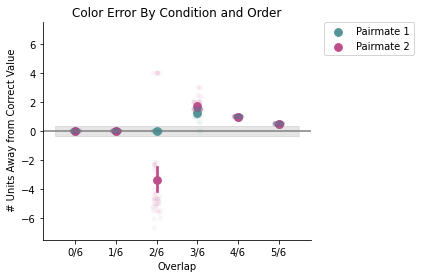

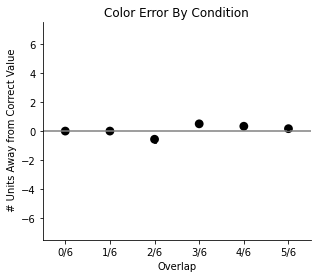

In [32]:
def plot_error_by_order(color_c_mass_df, ribbon = True) :
    plt.clf()
    color_error_data = color_c_mass_df[color_c_mass_df['stim'].isin(['med1', 'med2'])]
    color_error_data = color_c_mass_df[color_c_mass_df['time'].isin(['After'])]

    ax = plt.axhline(0, ls = '-', color = 'gray')

    ax = sns.stripplot(x='overlap', y = 'rev_error', hue = 'order', alpha = .05, palette = order_palette,
                       data = color_error_data)

    ax = sns.pointplot(x='overlap', y = 'rev_error', hue = 'order', data = color_error_data, alpha = .1, linestyles= ' ', palette = order_palette)
    handles, labels = ax.get_legend_handles_labels()

    x = np.arange(-.5, 5.5, .01)
    slope = 0
    y1 = x*slope -.35
    y2= x*slope +.35
    
    if ribbon == True:
        plt.fill_between(x, y1, y2, alpha = .2, color = 'grey', zorder = 0)
        
        
    l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    l.get_texts()[0].set_text('Pairmate 1')
    l.get_texts()[1].set_text('Pairmate 2')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    title = 'Color Error By Condition and Order'
    
    plt.title(title)
    plt.ylim([-7.5,7.5])
    plt.ylabel(' # Units Away from Correct Value')
    plt.xlabel('Overlap')
    plt.savefig(results_dir + title + '.png', bbox_inches='tight')
    plt.savefig(eps_dir  + title + '.eps', bbox_inches='tight')
    plt.show()

    
def plot_error(color_c_mass_df) :
    plt.clf()
    
    color_error_data = color_c_mass_df[color_c_mass_df['stim'].isin(['med1', 'med2'])]
    color_error_data = color_c_mass_df[color_c_mass_df['time'].isin(['After'])]

#     ax = sns.stripplot(x='overlap', y = 'rev_error', alpha = .1, color = 'k', data = color_error_data)
    ax = plt.axhline(0, ls = '-', color = 'gray')
    ax = sns.pointplot(x='overlap', y = 'rev_error', color = 'k', data = color_error_data, linestyles= ' ')
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    title = 'Color Error By Condition'
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.title(title)
    plt.ylim([-7.5,7.5])
    plt.ylabel(' # Units Away from Correct Value')
    plt.xlabel('Overlap')
    plt.savefig(results_dir + title + '.png', bbox_inches='tight')
    plt.show()

plot_error_by_order(color_c_mass_df, ribbon = True)
plot_error(color_c_mass_df)


In [56]:
def plot_color_distortion_vs_hidden_correlation():
    _c = (within_pair_correlation_pre_post["$CurrentTask"] == "TaskColorRecall") & (within_pair_correlation_pre_post["overlap"] == "2/6" )
    hidden_correlation = within_pair_correlation_pre_post[_c]
    #display(hidden_correlation)
    _c = (color_c_mass_df["overlap"] == "2/6") 
    color_distortion = color_c_mass_df[_c].dropna(subset=["order"])
    display(color_distortion)
    
    
plot_color_distortion_vs_hidden_correlation()

,index,run,time,type,stim,layer,c_o_m,true_c_o_m,raw_error,rev_error,order,overlap
1374,2,0,Before,raw,med1,color,24.504790,24.5,0.00479,0.00479,first,2/6
1375,3,0,Before,raw,med2,color,28.495168,28.5,-0.00483,0.00483,second,2/6
1380,8,0,After,raw,med1,color,24.499315,24.5,-0.00069,-0.00069,first,2/6
1381,9,0,After,raw,med2,color,33.500000,28.5,5.00000,-5.00000,second,2/6
1386,14,1,Before,raw,med1,color,24.504866,24.5,0.00487,0.00487,second,2/6
...,...,...,...,...,...,...,...,...,...,...,...,...
1945,573,47,After,raw,med2,color,28.500800,28.5,0.00080,-0.00080,first,2/6
1950,578,48,Before,raw,med1,color,24.504562,24.5,0.00456,0.00456,first,2/6
1951,579,48,Before,raw,med2,color,28.495155,28.5,-0.00485,0.00485,second,2/6
1956,584,48,After,raw,med1,color,24.499399,24.5,-0.00060,-0.00060,first,2/6


# Analyze Face Associate Task
<a id = 'face_task'></a>

In [33]:
def get_probability_face_unit(all_face_df) :
    
    plt.clf()
    temp = all_face_df.groupby(['|Run', '|Epoch', 'type', 'overlap'])['Act_M'].mean().reset_index()
    
    temp = temp.pivot(index=['|Run', '|Epoch', 'overlap'], columns='type', values='Act_M').reset_index()
    
    temp['Selected_Face'] = temp[['competitor', 'other', 'target']].idxmax(axis = 1)
    indiv_amounts = temp.groupby(['|Epoch', 'overlap'])['Selected_Face'].value_counts()
    uniques = pd.Index(temp['Selected_Face'].unique())
    total_amounts = temp.groupby(['|Epoch', 'overlap']).size()
    def f(x):
        return tuple(x.value_counts().sort_index().reindex(uniques, fill_value = 0))

    probability_face_df = temp.groupby(['|Epoch', 'overlap']).agg({'Selected_Face' : f})
    
    for i in range(len(uniques)):
        probability_face_df[uniques[i]] = probability_face_df.apply(lambda row: row.Selected_Face[i], axis=1).div(total_amounts)

    return probability_face_df
    
probability_face_df = get_probability_face_unit(all_face_df)

<Figure size 432x288 with 0 Axes>

In [ ]:
def plot_probability_all(probability_face_df):
    plt.clf()
    sns.lineplot(x = '|Epoch', y = 'target', hue='overlap', data = probability_face_df.reset_index(), palette = 'GnBu')
    title = 'Probability of Choosing Correct Face Unit'
    plt.title(title)
    plt.legend(title = 'Overlap', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.ylabel('% trials where Target Face Chosen')
    plt.xlabel('Epoch')
    plt.savefig(results_dir + title + '.png', bbox_inches='tight')
    plt.show()

plot_probability_all(probability_face_df)

In [ ]:
def Face_Unit_Activity_plot(all_face_df) :
    plt.clf()
    temp = all_face_df.groupby(['|Run', '|Epoch', 'type', 'overlap'])['Act_M'].mean().reset_index()

    g = sns.FacetGrid(temp, col = 'overlap', col_wrap=3, hue = 'type', palette = 'Dark2', ylim=(-.1, 1))
    g.map(sns.lineplot, '|Epoch', 'Act_M')
    g.set_axis_labels("Epoch", "Face Unit Activity")
    title = 'Face Unit Activity'
    plt.subplots_adjust(top=0.8)
    g.fig.suptitle(title.title())
    g.add_legend()
    plt.savefig(results_dir + title + '.png', bbox_inches='tight')
    plt.show()

    
Face_Unit_Activity_plot(all_face_df)

In [ ]:
def Face_Unit_Activity_plot_diff(all_face_df) :
    
    plt.clf()
    temp = all_face_df.groupby(['|Run', '|Epoch', 'type', 'overlap'])['Act_M'].mean().reset_index()
    temp = temp.pivot(index=['|Run', '|Epoch', 'overlap'], columns='type', values='Act_M').reset_index()
    temp['targ-comp'] = temp['target'] - temp['competitor']

    ax = sns.lineplot(x = '|Epoch', y = 'targ-comp', hue = 'overlap', data = temp, palette = 'GnBu')

    plt.ylabel('Target Unit Activity - Competitor Unit Activity')
    plt.xlabel('Epoch')
    plt.ylim(-.1, 1)
    plt.legend(title = 'Overlap Condition', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    title = 'Face Unit Activity (Target - Competitor)'
    plt.title(title)
    plt.savefig(results_dir + title + '.png', bbox_inches='tight')
    plt.show()

Face_Unit_Activity_plot_diff(all_face_df)

In [ ]:
# temp[temp['overlap'] == '0/6']['targ-comp']

In [ ]:
# import scipy.stats as stats
# # stats f_oneway functions takes the groups as input and returns ANOVA F and p value
# fvalue, pvalue = stats.f_oneway(temp[temp['overlap'] == '0/6']['targ-comp'], temp[temp['overlap'] == '1/6']['targ-comp'], temp[temp['overlap'] == '2/6']['targ-comp'], temp[temp['overlap'] == '3/6']['targ-comp'], temp[temp['overlap'] == '4/6']['targ-comp'], temp[temp['overlap'] == '5/6']['targ-comp'])
# print(fvalue)
# print(pvalue)
                                     

In [ ]:
# overlap = color_c_mass_df['overlap']=='2/6'
# post = color_c_mass_df['time']=='post'
# type1 = color_c_mass_df['type']=='raw'
# a = color_c_mass_df[overlap & post & type1]
# a.sort_values('rev_error', ascending = False)

## Repulsion % analysis

In [ ]:
def repulsion_over_time(all_repulsion_df) :
    all_repulsion_df = (all_repulsion_df.set_index(pd.Series((range(len(all_repulsion_df))))))
    plt.clf()
    sns.lineplot(x = 'epoch', y = 'repulsion_percent', hue = 'overlap', data = all_repulsion_df, palette = 'GnBu', alpha = .4)
    plt.axhline(y = 50, color = 'k', linestyle= '--')
    plt.ylim(-5,105)
    plt.ylabel('Repulsion Probability (%)')

    title = 'Repulsion Probability Over Time'
    plt.title(title)
    plt.legend(title = 'Overlap Condition', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


    plt.savefig(results_dir + title + '.png', bbox_inches='tight')

    plt.show()

repulsion_over_time(all_repulsion_df)

In [ ]:
def repulsion_final_percent_trials(data) :

    plt.clf()

    temp = all_repulsion_df[all_repulsion_df['epoch'] == all_repulsion_df['epoch'].max()]
    sns.scatterplot(x = 'overlap', y = 'repulsion_percent', data = temp)
    plt.axhline(y = 50, color = 'k', linestyle= '--')
    plt.ylim(-5,105)
    plt.ylabel('Repulsion Probability (%)')

    title = 'Repulsion Probability (End)'
    plt.title(title)

    plt.savefig(results_dir + title + '.png', bbox_inches='tight')

    plt.show()
    
repulsion_final_percent_trials(all_repulsion_df)

### END

In [ ]:
print('done with cross-pair analysis!')